## Supplement 4: Classification

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics import roc_auc_score


In [66]:
train_data = pd.read_csv(r'F:\1.DS material\MLSP\Ex\ex2\train-songs.csv')
test_data = pd.read_csv(r'F:\1.DS material\MLSP\Ex\ex2\test-songs.csv')


### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [67]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_loss(X, y, weights):
    epsilon = 1e-15  # Small constant to avoid log(0)
    predictions = sigmoid(np.dot(X, weights))
    predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Ensure predictions are within (0, 1)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss


def logistic_regression_gradient(X, y, weights):
    n_samples = X.shape[0]
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y)) / n_samples
    return gradient


   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




In [68]:
def train_logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  

    for i in range(num_iterations):
        gradient = logistic_regression_gradient(X, y, weights)
        weights -= learning_rate * gradient  
    return weights


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


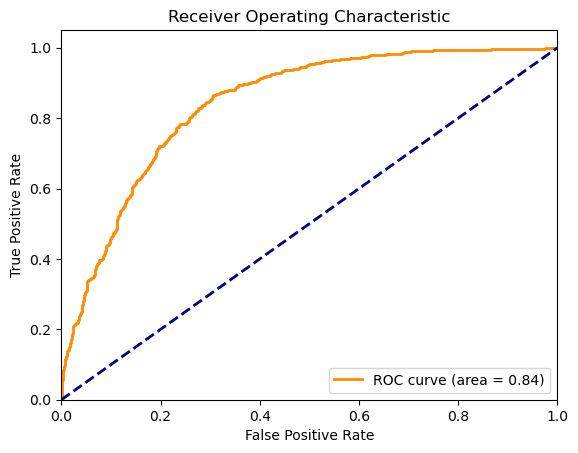

Confusion Matrix:
[[948  52]
 [675 325]]
Precision: 0.86
Recall: 0.33
F1 Score: 0.47
AUC: 0.84


In [69]:

X_train = train_data.drop('popular', axis=1).values
y_train = train_data['popular'].values
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  


weights = train_logistic_regression(X_train, y_train)


X_test = test_data.drop('popular', axis=1).values
y_test = test_data['popular'].values
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # Adding a bias term


predictions_prob = sigmoid(np.dot(X_test, weights))
predictions = (predictions_prob >= 0.4).astype(int)  # Apply threshold


conf_matrix = confusion_matrix(y_test, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary')
fpr, tpr, _ = roc_curve(y_test, predictions_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


In [70]:
from sklearn.metrics import roc_auc_score

y_train = train_data['popular'].values
y_test = test_data['popular'].values

features_A = ['danceability', 'key', 'valence', 'tempo']
features_B = ['danceability', 'loudness', 'acousticness', 'instrumentalness']
features_C = ['key', 'liveness', 'valence', 'tempo']

def train_evaluate_model(features):
    X_train_subset = train_data[features].values
    X_train_subset = np.hstack([np.ones((X_train_subset.shape[0], 1)), X_train_subset])  # Add bias term

    if X_train_subset.shape[0] != y_train.shape[0]:
        raise ValueError("Mismatch in number of training samples")

    X_test_subset = test_data[features].values
    X_test_subset = np.hstack([np.ones((X_test_subset.shape[0], 1)), X_test_subset])  # Add bias term

    if X_test_subset.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch in number of testing samples")

    weights_subset = train_logistic_regression(X_train_subset, y_train)

    predictions_prob_subset = sigmoid(np.dot(X_test_subset, weights_subset))

    auc_score = roc_auc_score(y_test, predictions_prob_subset)
    return auc_score

auc_A = train_evaluate_model(features_A)
auc_B = train_evaluate_model(features_B)
auc_C = train_evaluate_model(features_C)

print(f"AUC for Model A: {auc_A:.2f}")
print(f"AUC for Model B: {auc_B:.2f}")
print(f"AUC for Model C: {auc_C:.2f}")


AUC for Model A: 0.44
AUC for Model B: 0.87
AUC for Model C: 0.44


v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

In [72]:

features_A = ['danceability', 'key', 'valence', 'tempo']
features_B = ['danceability', 'loudness', 'acousticness', 'instrumentalness']
features_C = ['key', 'liveness', 'valence', 'tempo']

def train_evaluate_model(X_train, y_train, X_test, y_test, features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    X_train_subset = np.hstack([np.ones((X_train_subset.shape[0], 1)), X_train_subset])
    X_test_subset = np.hstack([np.ones((X_test_subset.shape[0], 1)), X_test_subset])

    weights = train_logistic_regression(X_train_subset, y_train)

    predictions_prob = sigmoid(np.dot(X_test_subset, weights))

    return roc_auc_score(y_test, predictions_prob)

y_train = train_data['popular'].values
y_test = test_data['popular'].values

auc_scores = {
    "Model A": train_evaluate_model(train_data, y_train, test_data, y_test, features_A),
    "Model B": train_evaluate_model(train_data, y_train, test_data, y_test, features_B),
    "Model C": train_evaluate_model(train_data, y_train, test_data, y_test, features_C)
}

for model, auc in auc_scores.items():
    print(f"{model}: AUC = {auc:.2f}")

best_model = max(auc_scores, key=auc_scores.get)
print(f"The best performing model is {best_model} with an AUC of {auc_scores[best_model]:.2f}")


Model A: AUC = 0.44
Model B: AUC = 0.87
Model C: AUC = 0.44
The best performing model is Model B with an AUC of 0.87
